In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
#Reading CSV file
mainDF=pd.read_csv(r'C:\Users\goswa\Documents\Covid-19\covid_19_india.csv')
india_DF=mainDF.copy()

In [3]:
mainDF.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
mainDF.shape

(16526, 9)

#####  16526 rows and 9 columns

In [5]:
mainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16526 entries, 0 to 16525
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16526 non-null  int64 
 1   Date                      16526 non-null  object
 2   Time                      16526 non-null  object
 3   State/UnionTerritory      16526 non-null  object
 4   ConfirmedIndianNational   16526 non-null  object
 5   ConfirmedForeignNational  16526 non-null  object
 6   Cured                     16526 non-null  int64 
 7   Deaths                    16526 non-null  int64 
 8   Confirmed                 16526 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [6]:
mainDF.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

0 null values

#### In dataset Confirmed foreign+confirmed National = total confirmed 

### Adding Active Cases features in DataFrame

In [7]:
mainDF['Active Cases']=mainDF['Confirmed']-mainDF['Cured']-mainDF['Deaths']

In [8]:
mainDF.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active Cases
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3


In [9]:
print('total states/union territory=',len(mainDF['State/UnionTerritory'].unique()))
mainDF['State/UnionTerritory'].unique()

total states/union territory= 42


array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [10]:
mainDF.groupby(['State/UnionTerritory']).median().style.bar(['Active Cases'])

,Sno,Cured,Deaths,Confirmed,Active Cases
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,8259.500000,4247.000000,60.000000,4470.000000,70.000000
Andhra Pradesh,8015.500000,800475.000000,6726.500000,829306.500000,8491.500000
Arunachal Pradesh,8401.500000,14370.000000,47.500000,15775.000000,236.000000
Assam,8367.500000,204400.000000,957.500000,209951.500000,3517.500000
Bihar,8158.500000,212982.500000,1132.500000,220517.500000,4996.000000
Bihar****,15865.000000,701234.000000,9440.500000,715454.500000,4780.000000
Cases being reassigned to states,3189.000000,0.000000,0.000000,6623.000000,6623.000000
Chandigarh,8142.000000,13925.000000,230.000000,14927.000000,535.000000
Chhattisgarh,8143.000000,172513.000000,2412.000000,197991.000000,8424.000000


##### Maharashtra has the highest active cases

In [11]:
# Arranging states in decreasing order of Active Cases
sortByActiveCases=mainDF.copy()
sortByActiveCases=sortByActiveCases.groupby(['State/UnionTerritory']).median().sort_values(['Active Cases'],ascending=False)
x=np.array(sortByActiveCases.index)
x=x.tolist()

for i in range(0,len(x)):
    print(x[i])
    


Maharashtra
Telangana
Kerala
Karnataka
Tamil Nadu
West Bengal
Uttar Pradesh
Gujarat
Delhi
Andhra Pradesh
Chhattisgarh
Madhya Pradesh
Rajasthan
Cases being reassigned to states
Telengana
Haryana
Punjab
Bihar
Bihar****
Jammu and Kashmir
Assam
Odisha
Uttarakhand
Jharkhand
Himachal Pradesh
Goa
Manipur
Nagaland
Tripura
Meghalaya
Chandigarh
Puducherry
Ladakh
Sikkim
Arunachal Pradesh
Dadra and Nagar Haveli
Mizoram
Lakshadweep
Andaman and Nicobar Islands
Dadra and Nagar Haveli and Daman and Diu
Unassigned
Daman & Diu


In [12]:
mainDF['Date'] = pd.to_datetime(mainDF['Date'])
mainDF.set_index('Date',inplace=True)

In [13]:
mainDF.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active Cases
Date,,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3,3


In [14]:
count=[[]]
for j in x:
    countdf=mainDF[mainDF['State/UnionTerritory']==j]
    daily=[0]
    for i in range(1,len(countdf)):
        daily.append(countdf['Confirmed'].iloc[i]-countdf['Confirmed'].iloc[i-1])
    countdf['Daily']=daily
    count.append(countdf)
  

C:\Users\goswa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
count=np.array(count)

## State Wise Daily Cases

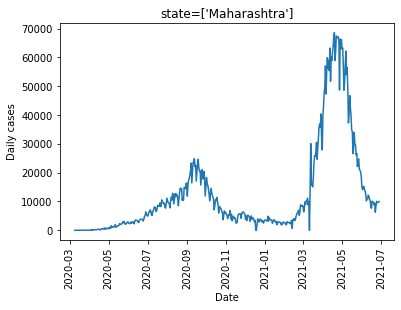

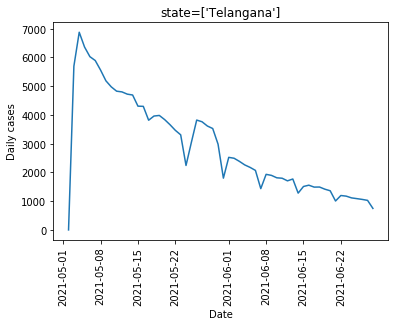

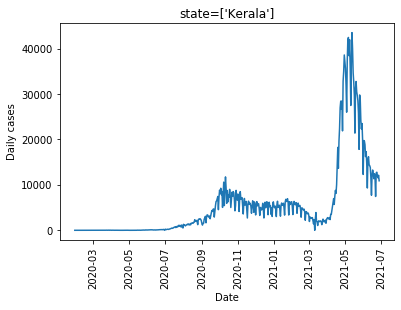

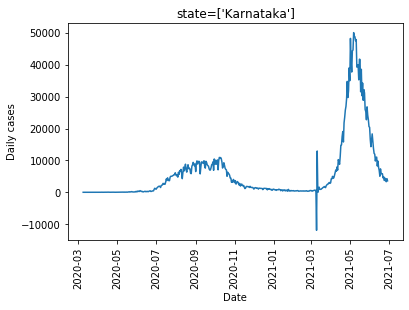

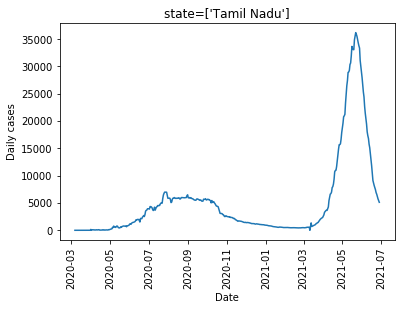

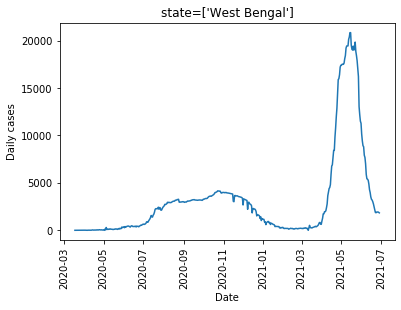

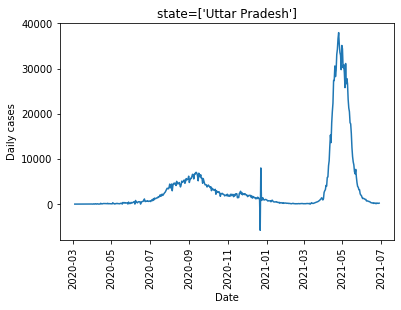

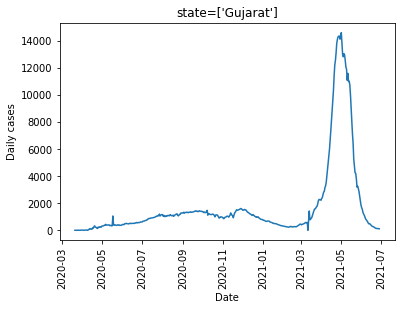

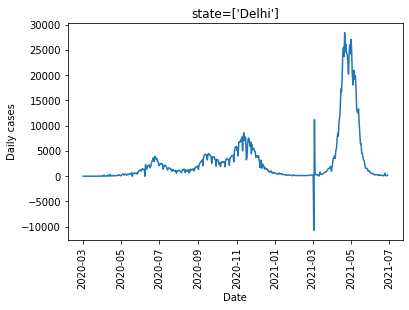

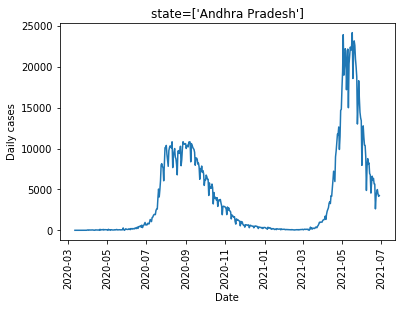

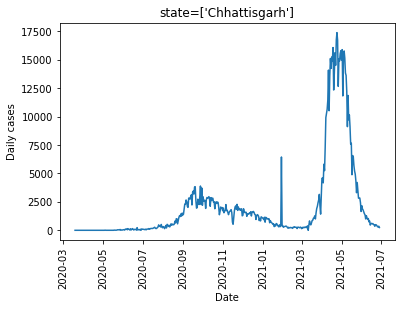

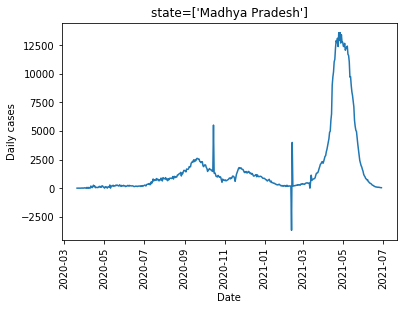

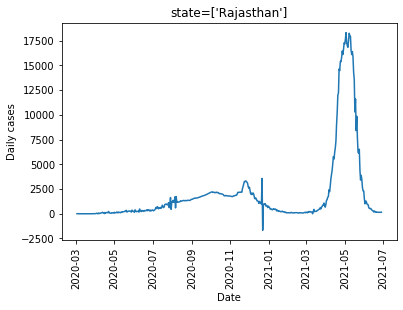

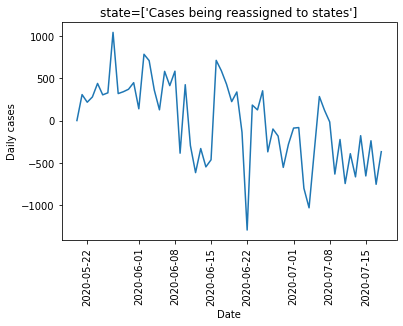

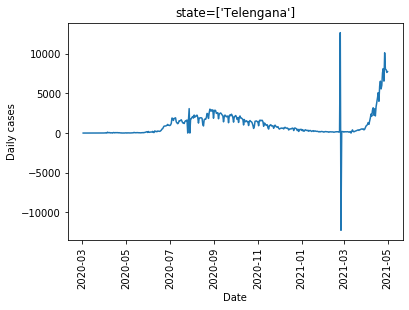

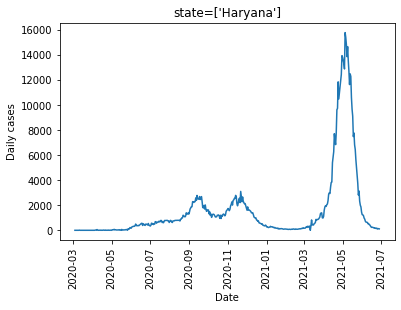

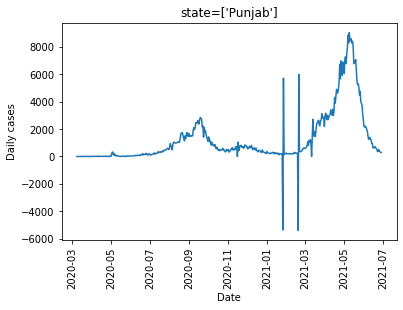

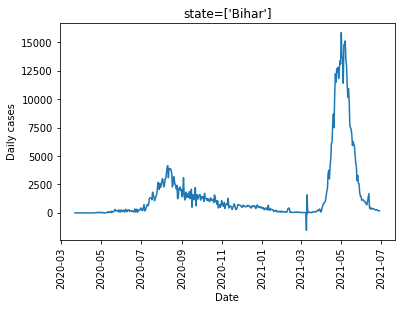

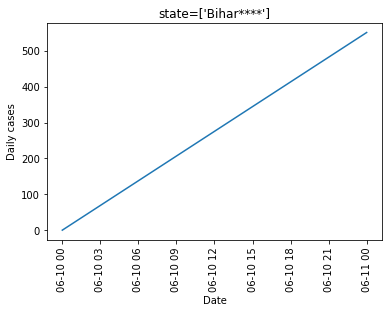

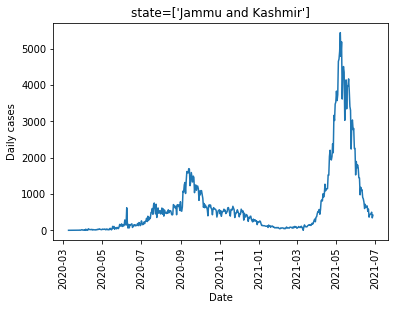

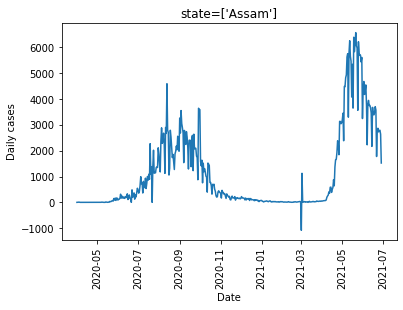

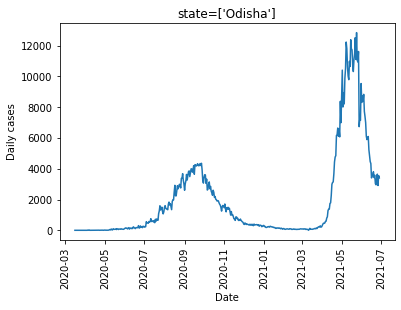

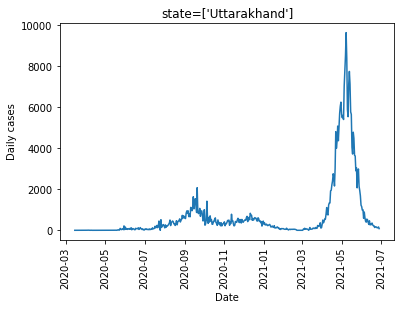

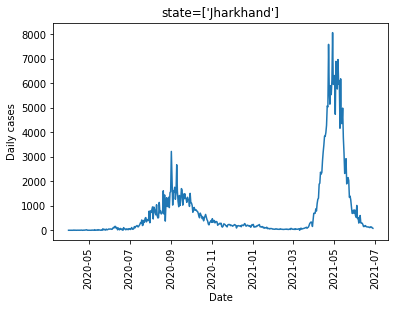

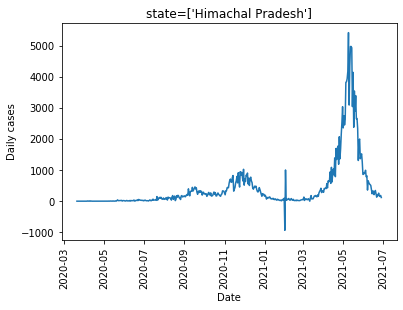

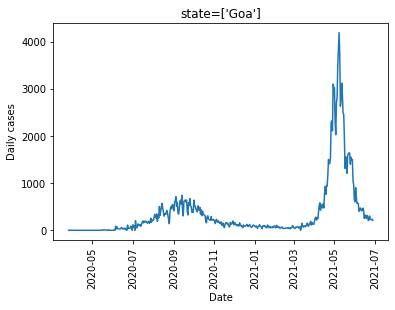

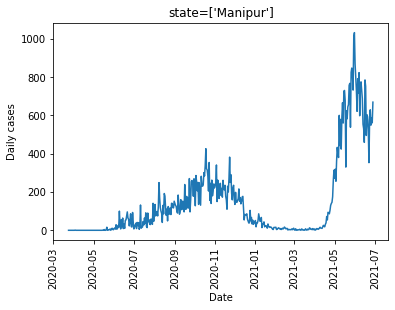

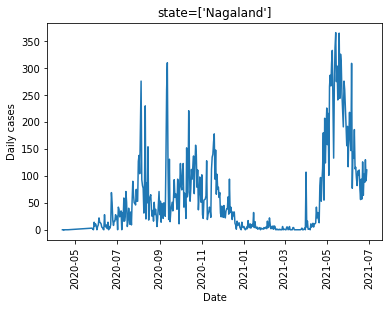

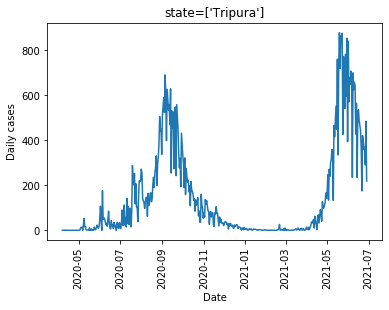

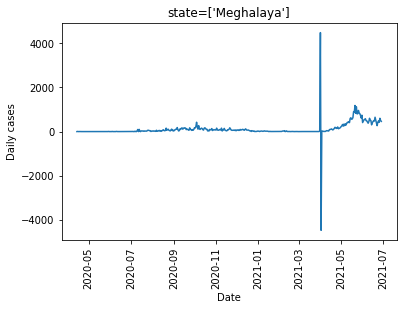

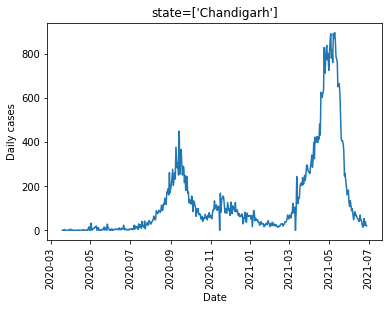

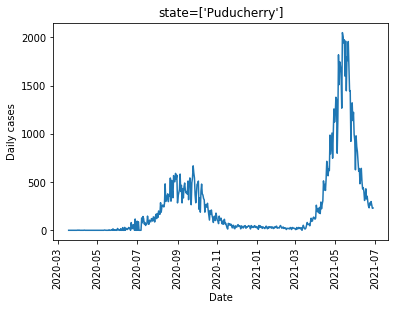

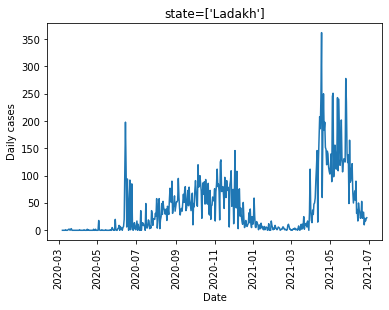

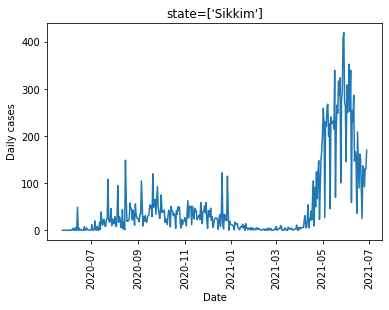

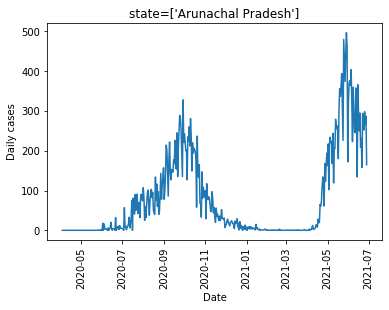

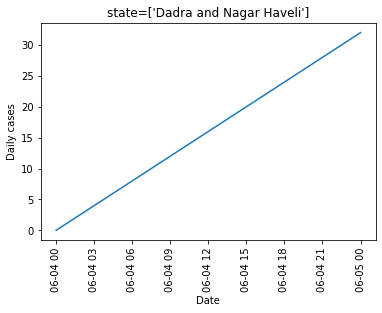

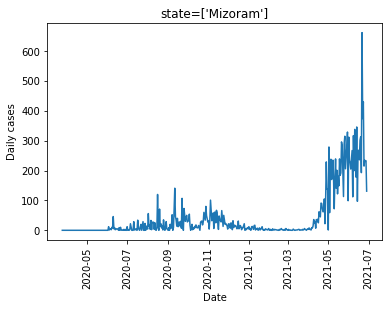

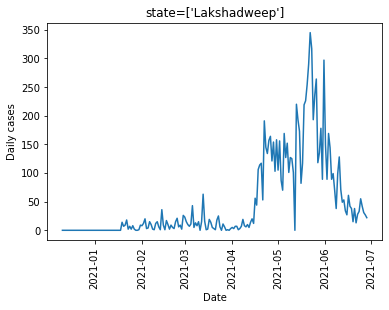

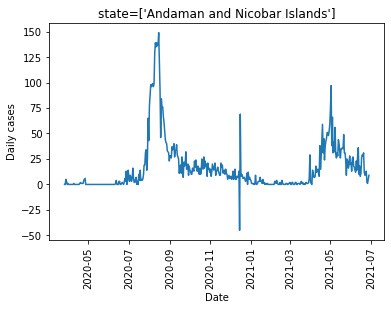

In [16]:
for i in range(1,40):
    plt.title('state={}'.format(count[i]['State/UnionTerritory'].head(1).values))
    plt.xlabel('Date')
    plt.ylabel('Daily cases')
    sns.lineplot(count[i].index,count[i]['Daily'])
    plt.xticks(rotation='vertical')
    plt.show()


In [17]:
df1=mainDF.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

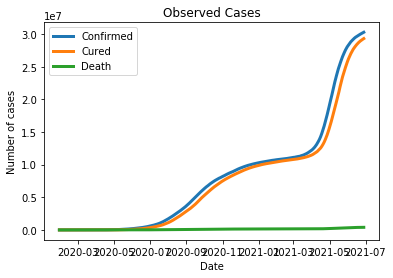

In [18]:
#Total obseved cases
plt.title('Observed Cases')
plt.xlabel('Date')
plt.ylabel('Number of cases')
sns.lineplot(df1.index,df1['Confirmed'],linewidth=3,label='Confirmed')
sns.lineplot(df1.index,df1['Cured'],linewidth=3,label='Cured',)
sns.lineplot(df1.index,df1['Deaths'],linewidth=3,label='Death')
plt.legend()

In [19]:
mainDF.to_csv('afterEDA',index=False)

In [20]:
top_10_death_states = mainDF.sort_values('Deaths',ascending = False)[:10]
top_10_death_states

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active Cases
Date,,,,,,,,,
2021-06-28,16511,8:00 AM,Maharashtra,-,-,5790113,121286,6036821,125422
2021-06-27,16475,8:00 AM,Maharashtra,-,-,5781551,120881,6026847,124415
2021-06-26,16439,8:00 AM,Maharashtra,-,-,5772799,120370,6017035,123866
2021-06-25,16403,8:00 AM,Maharashtra,-,-,5762661,119859,6007431,124911
2021-06-24,16367,8:00 AM,Maharashtra,-,-,5753290,119303,5997587,124994
2021-06-23,16331,8:00 AM,Maharashtra,-,-,5742258,118795,5987521,126468
2021-06-22,16295,8:00 AM,Maharashtra,-,-,5733215,118313,5979051,127523
2021-06-21,16259,8:00 AM,Maharashtra,-,-,5719457,117961,5972781,135363
2021-06-20,16223,8:00 AM,Maharashtra,-,-,5710356,117356,5963420,135708


In [21]:
india_DF['Date'] = pd.to_datetime(india_DF['Date'])
india_cases = india_DF[india_DF['Date'] == india_DF['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)

In [22]:
india_DF.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


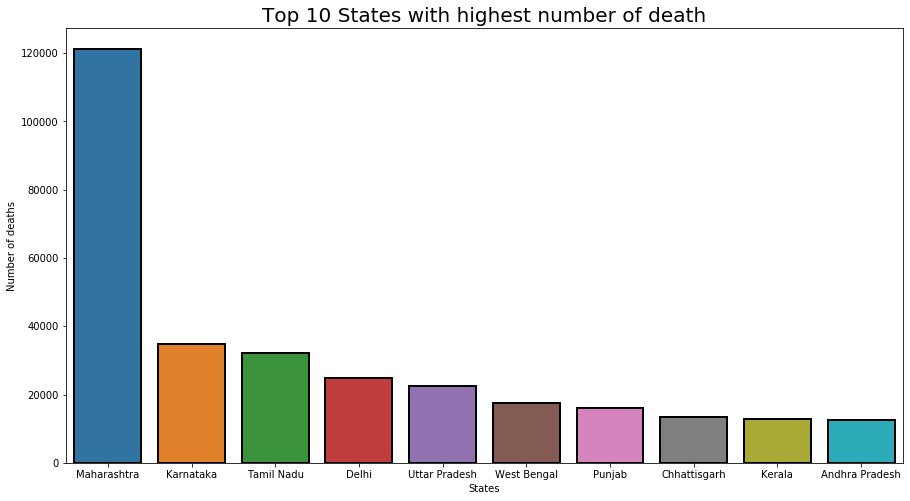

In [23]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of deaths')
plt.show()

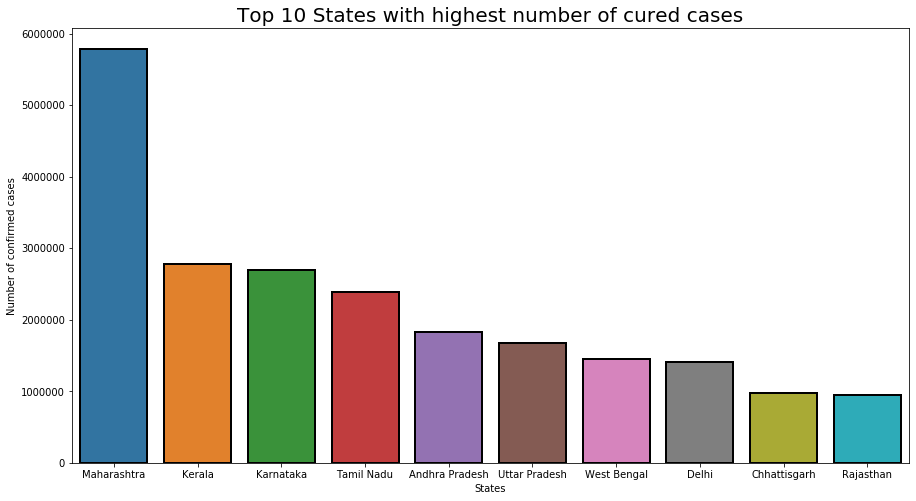

In [24]:
top_10_cured_cases = india_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.Cured,x=top_10_cured_cases.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()